In [1]:
pip install ucimlrepo seaborn matplotlib pandas

📌 Data Cirrhosis (gabungan fitur dan target):
              Drug    Age Sex Ascites Hepatomegaly Spiders Edema  Bilirubin  \
0  D-penicillamine  21464   F       Y            Y       Y     Y       14.5   
1  D-penicillamine  20617   F       N            Y       Y     N        1.1   
2  D-penicillamine  25594   M       N            N       N     S        1.4   
3  D-penicillamine  19994   F       N            Y       Y     S        1.8   
4          Placebo  13918   F       N            Y       Y     N        3.4   

  Cholesterol  Albumin Copper  Alk_Phos    SGOT Tryglicerides Platelets  \
0         261     2.60    156    1718.0  137.95           172       190   
1         302     4.14     54    7394.8  113.52            88       221   
2         176     3.48    210     516.0   96.10            55       151   
3         244     2.54     64    6121.8   60.63            92       183   
4         279     3.53    143     671.0  113.15            72       136   

   Prothrombin  Stage Status

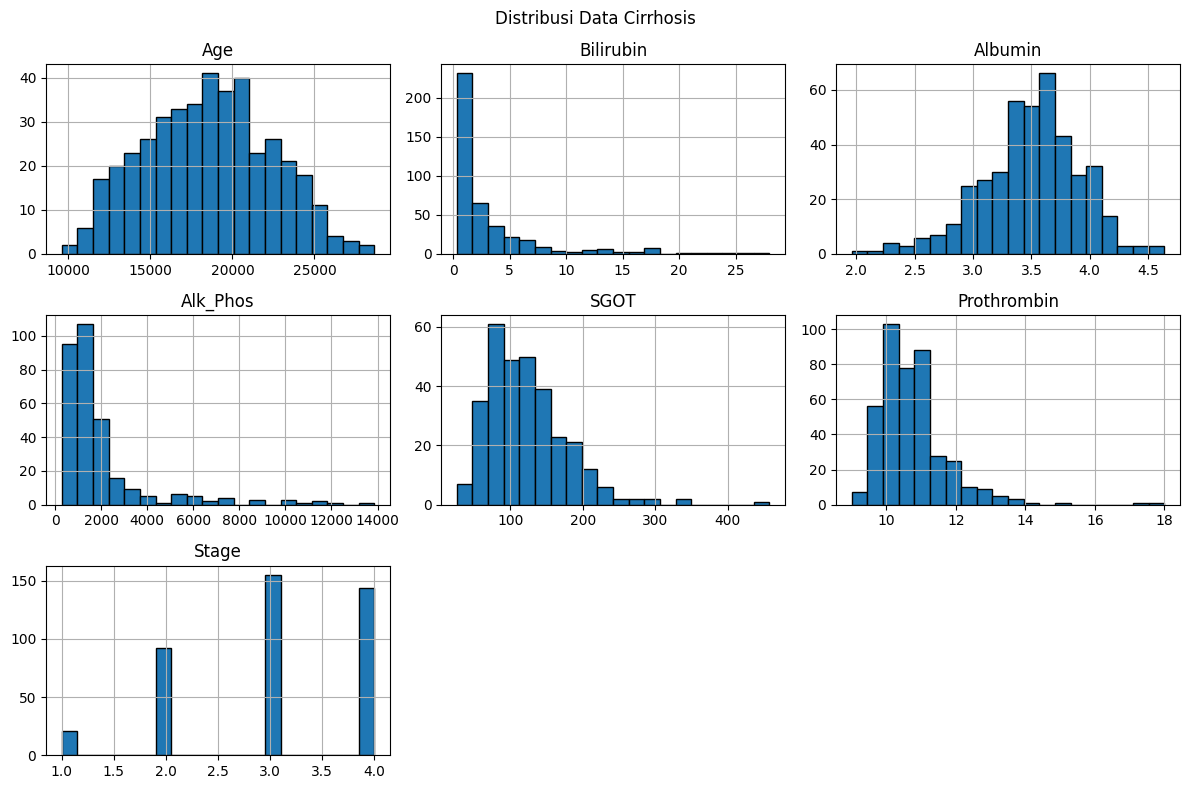

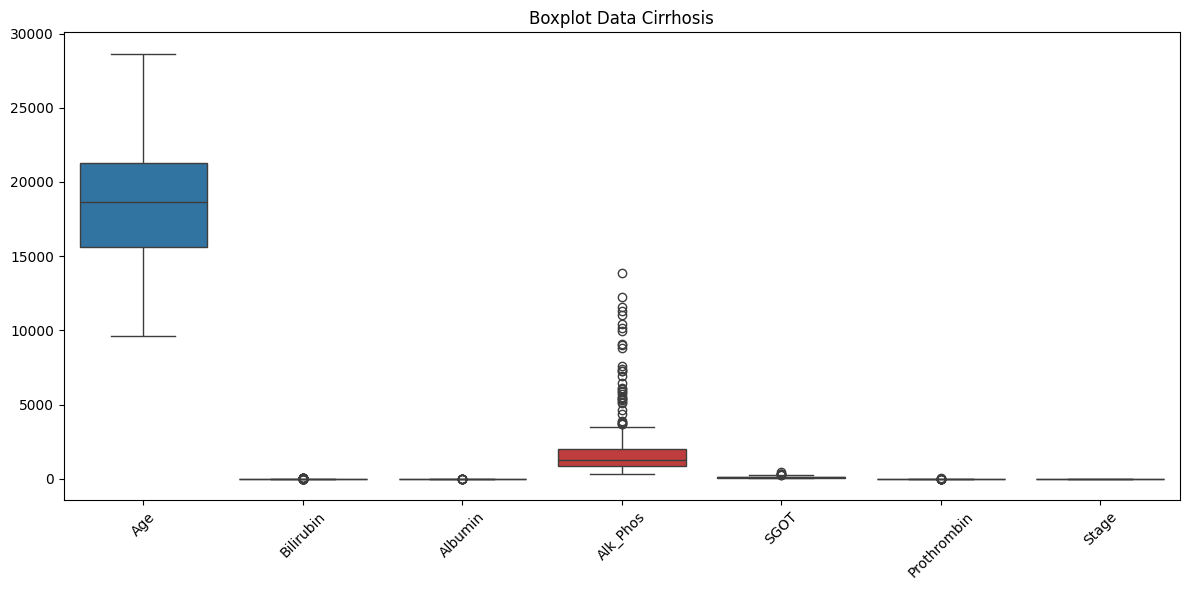

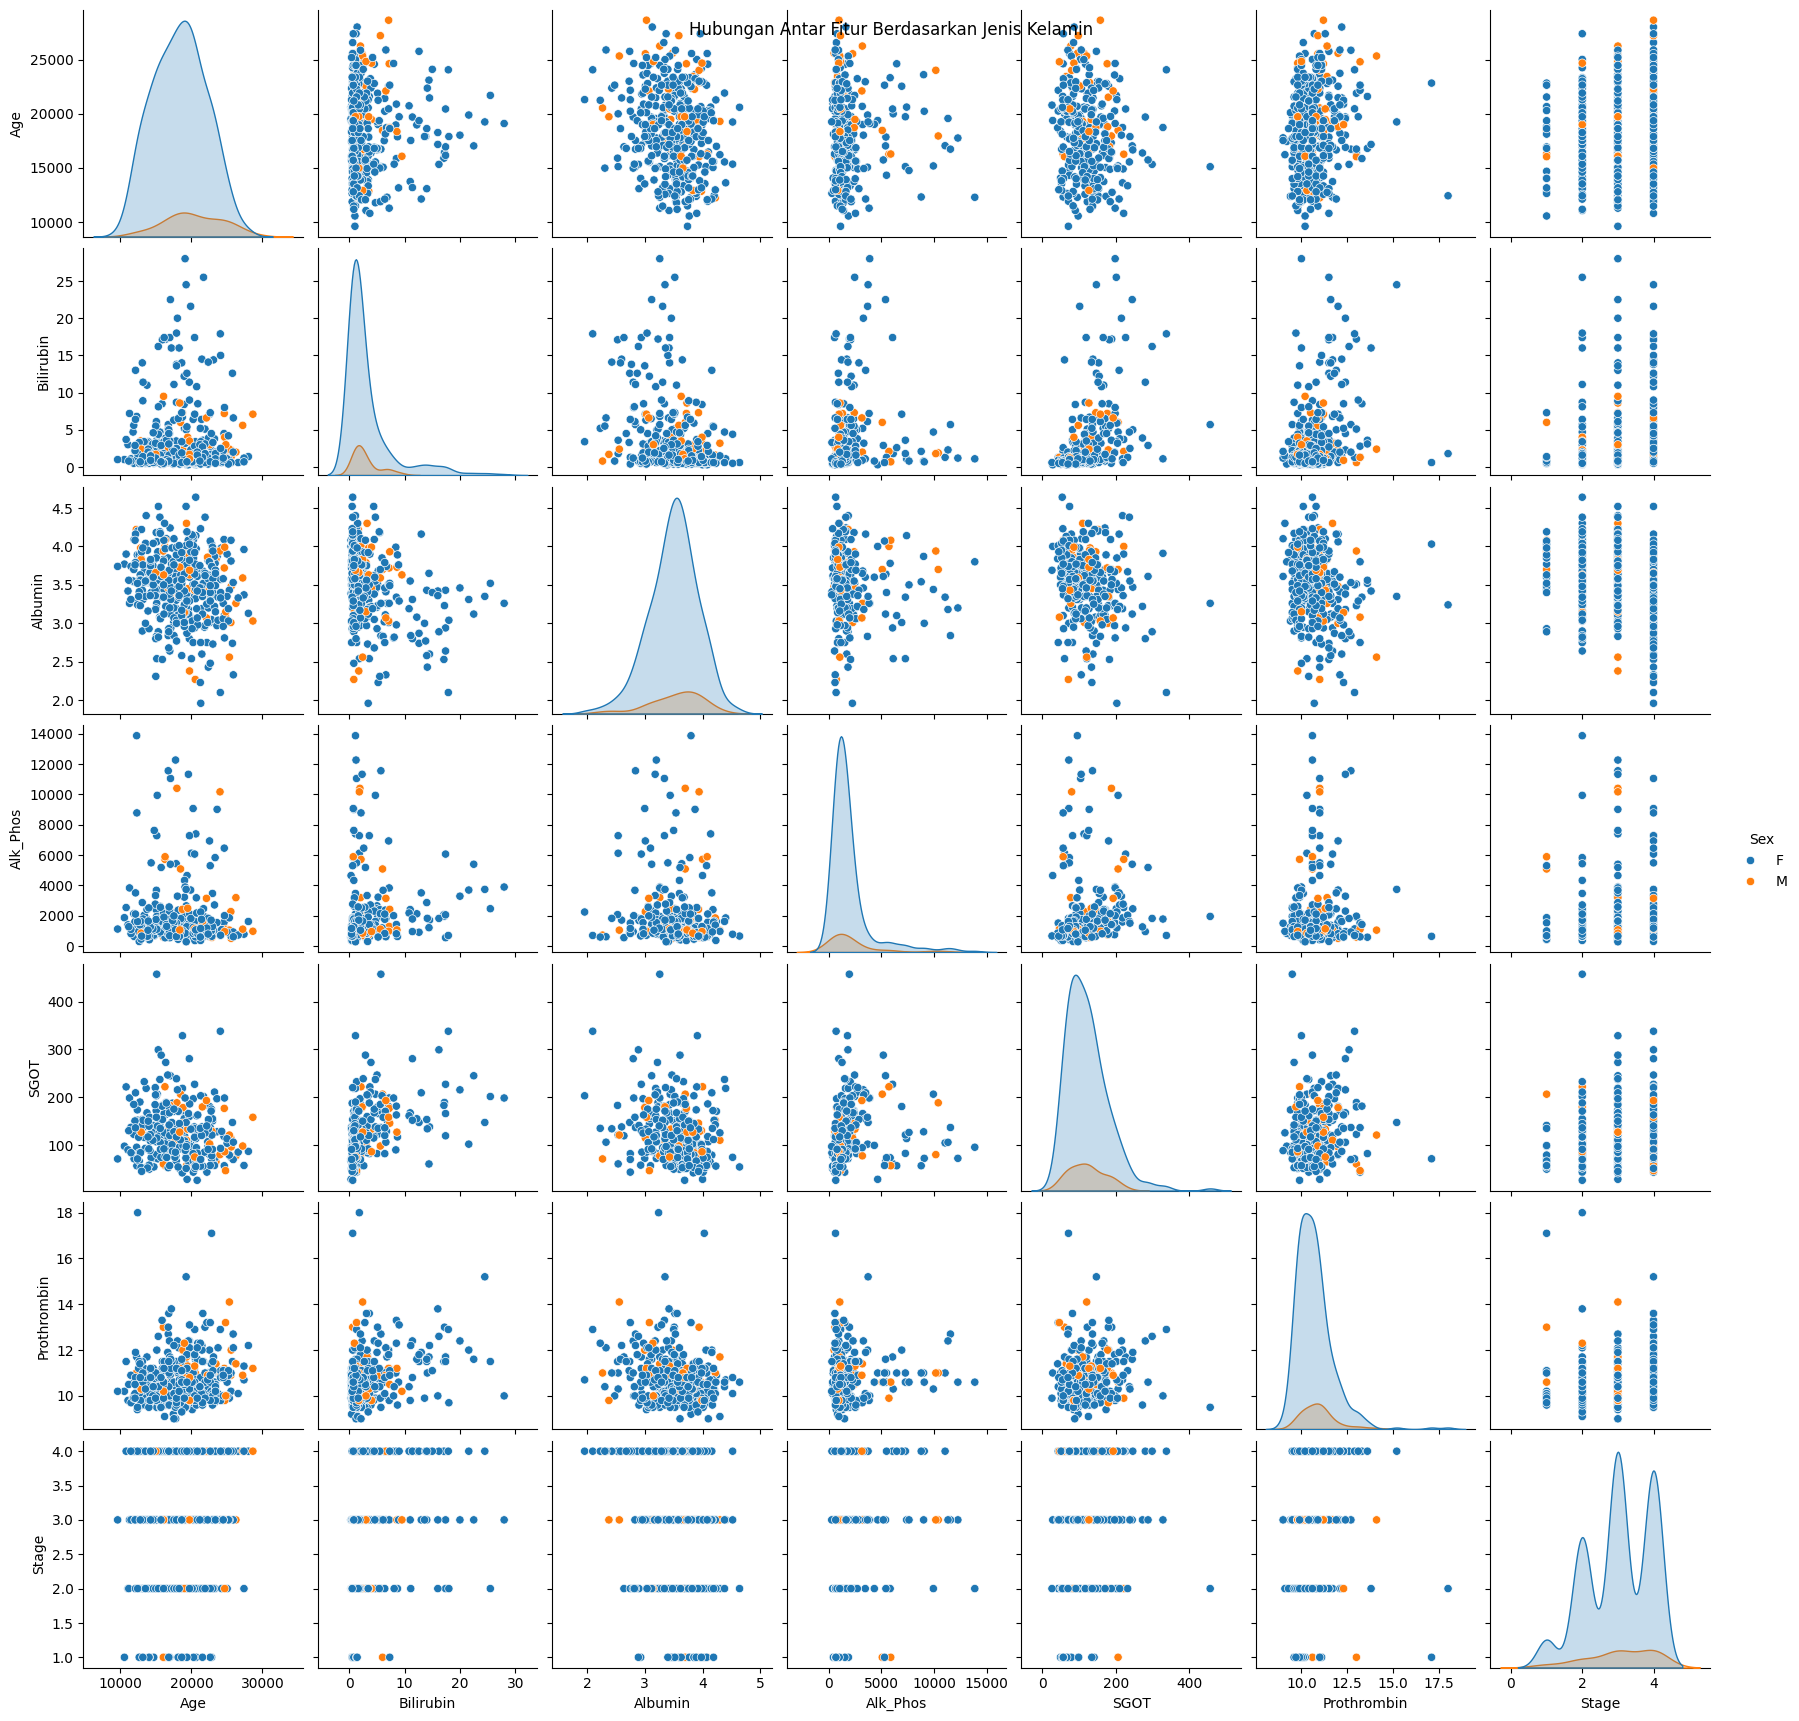

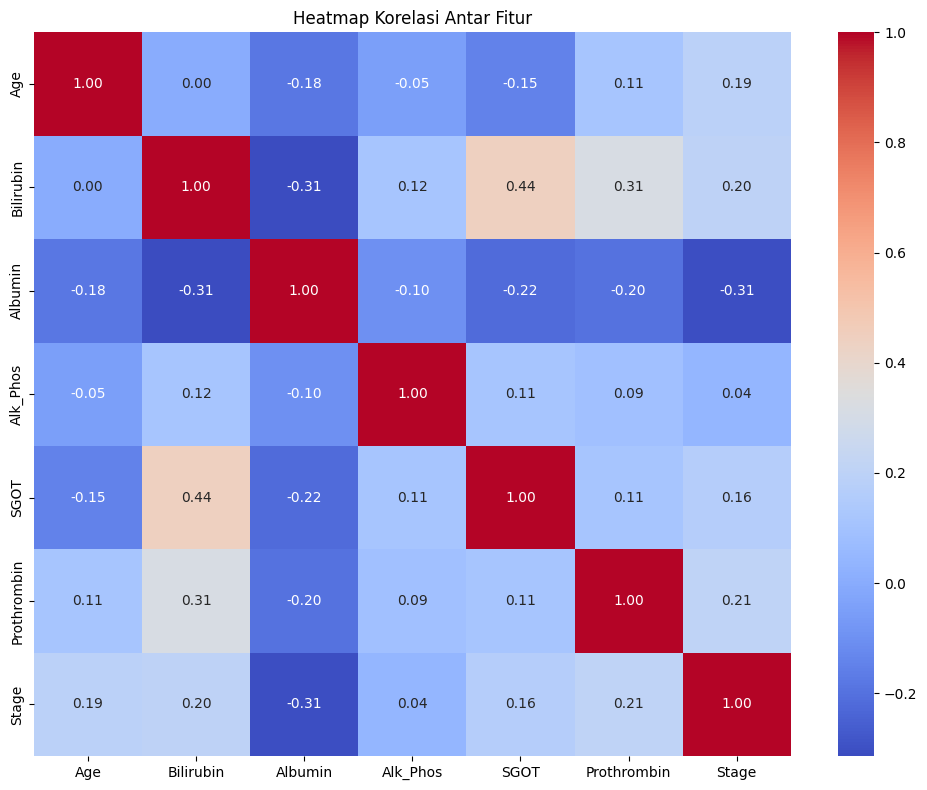

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo

# Ambil data dari UCI
cirrhosis = fetch_ucirepo(id=878)

# Data dan Target
X = cirrhosis.data.features
y = cirrhosis.data.targets

# Gabungkan fitur dan target
df = pd.concat([X, y], axis=1)

# Tampilkan beberapa baris pertama
print("📌 Data Cirrhosis (gabungan fitur dan target):")
print(df.head())

# Cek informasi data
print("\n📌 Informasi Data:")
print(df.info())

# Tipe Data
print("\n📌 Tipe Data:")
print(df.dtypes)

# Missing Values
print("\n📌 Jumlah Missing Values:")
print(df.isnull().sum())

# Statistik Deskriptif
print("\n📌 Statistik Deskriptif:")
print(df.describe())

# Distribusi Target (contoh: 'Status' atau 'Stage')
print("\n📌 Distribusi Kelas Target:")
target_column = 'Stage' if 'Stage' in df.columns else df.columns[-1]
print(df[target_column].value_counts())

# Histogram distribusi fitur numerik
df.select_dtypes(include='number').hist(figsize=(12, 8), bins=20, edgecolor="black")
plt.suptitle("Distribusi Data Cirrhosis")
plt.tight_layout()
plt.show()

# Boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.select_dtypes(include='number'))
plt.title("Boxplot Data Cirrhosis")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Pairplot berdasarkan fitur kategori jika ada
if 'Sex' in df.columns:
    sns.pairplot(df, hue='Sex', diag_kind="kde")
    plt.suptitle("Hubungan Antar Fitur Berdasarkan Jenis Kelamin")
    plt.show()

# Heatmap Korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap Korelasi Antar Fitur")
plt.tight_layout()
plt.show()

In [3]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

# 1. Ambil dataset dari UCI
dataset = fetch_ucirepo(id=878)

# 2. Pisahkan fitur dan target
X = dataset.data.features.copy()
y = dataset.data.targets.copy()

# 3. Cek tipe data dan missing value
print("Info awal:")
print(X.info())
print("\nJumlah missing values:")
print(X.isnull().sum())

# 4. Imputasi nilai hilang
# Pisahkan kolom numerik dan kategorikal
numerik_cols = X.select_dtypes(include=['int64', 'float64']).columns
kategorik_cols = X.select_dtypes(include=['object', 'category', 'bool']).columns

# Imputasi numerik dengan median
imputer_num = SimpleImputer(strategy='median')
X[numerik_cols] = imputer_num.fit_transform(X[numerik_cols])

# Imputasi kategorikal dengan modus
imputer_cat = SimpleImputer(strategy='most_frequent')
X[kategorik_cols] = imputer_cat.fit_transform(X[kategorik_cols])

# 5. Encode fitur kategorikal
le_dict = {}
for col in kategorik_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    le_dict[col] = le  # Simpan encoder untuk inverse_transform jika diperlukan

# 6. Scaling fitur numerik (optional tapi disarankan)
scaler = StandardScaler()
X[numerik_cols] = scaler.fit_transform(X[numerik_cols])

# 7. Encode target variable
target_encoder = LabelEncoder()
y = target_encoder.fit_transform(y)

# 8. Cek hasil akhir preprocessing
print("\nData setelah preprocessing:")
print(X.head())
print("\nTarget setelah encoding:")
print(y[:5])

# 9. Membagi data menjadi data pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("\nData Training (X_train):")
print(X_train.head())
print("\nData Testing (X_test):")
print(X_test.head())
print("\nTarget Training (y_train):")
print(y_train[:5])
print("\nTarget Testing (y_test):")
print(y_test[:5])

Info awal:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Drug           313 non-null    object 
 1   Age            418 non-null    int64  
 2   Sex            418 non-null    object 
 3   Ascites        313 non-null    object 
 4   Hepatomegaly   313 non-null    object 
 5   Spiders        313 non-null    object 
 6   Edema          418 non-null    object 
 7   Bilirubin      418 non-null    float64
 8   Cholesterol    312 non-null    object 
 9   Albumin        418 non-null    float64
 10  Copper         312 non-null    object 
 11  Alk_Phos       312 non-null    float64
 12  SGOT           312 non-null    float64
 13  Tryglicerides  312 non-null    object 
 14  Platelets      411 non-null    object 
 15  Prothrombin    416 non-null    float64
 16  Stage          412 non-null    float64
dtypes: float64(6), int64(1), object(10)
memory 

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'uci_id': 878, 'name': 'Cirrhosis Patient Survival Prediction', 'repository_url': 'https://archive.ics.uci.edu/dataset/878/cirrhosis+patient+survival+prediction+dataset-1', 'data_url': 'https://archive.ics.uci.edu/static/public/878/data.csv', 'abstract': 'Utilize 17 clinical features for predicting survival state of patients with liver cirrhosis. The survival states include 0 = D (death), 1 = C (censored), 2 = CL (censored due to liver transplantation).', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 418, 'num_features': 17, 'feature_types': ['Real', 'Categorical'], 'demographics': ['Age', 'Sex'], 'target_col': ['Status'], 'index_col': ['ID'], 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5R02G', 'creators': ['E. Dickson', 'P. Grambsch', 'T. Fleming', 'L. Fisher', 'A. Langworthy'], 'intro_paper': {'ID': 296, 'type'

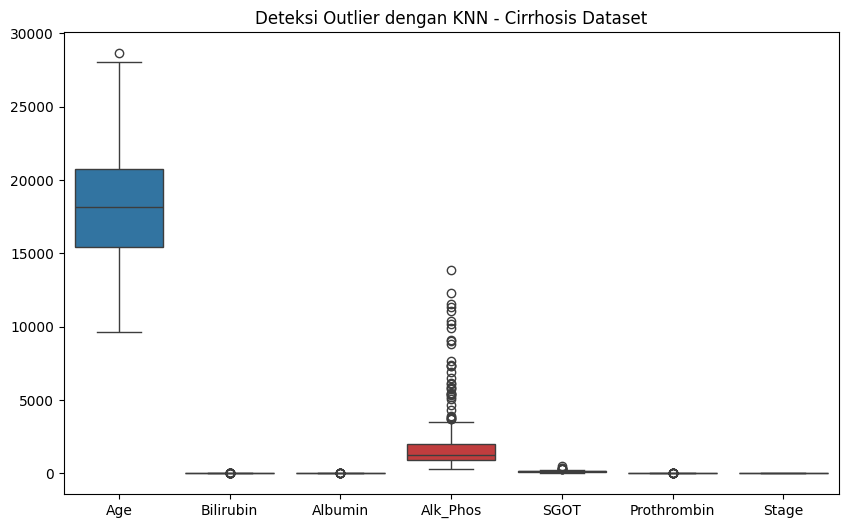

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import NearestNeighbors
from ucimlrepo import fetch_ucirepo

# Fetch dataset Cirrhosis Patient Survival Prediction
cirrhosis_patient_survival_prediction = fetch_ucirepo(id=878)

# Load features (X) and target (y) from the dataset
X = cirrhosis_patient_survival_prediction.data.features
y = cirrhosis_patient_survival_prediction.data.targets

# Tampilkan metadata dan informasi variabel
print(cirrhosis_patient_survival_prediction.metadata)
print(cirrhosis_patient_survival_prediction.variables)

# Pilih kolom numerik untuk analisis outlier (misalnya, gunakan semua fitur numerik)
features = X.select_dtypes(include=['float64', 'int64']).columns
df_numeric = X[features].dropna()

# Membangun model KNN
k = 5
knn = NearestNeighbors(n_neighbors=k)
knn.fit(df_numeric)

# Hitung jarak rata-rata ke 5 tetangga terdekat
distances, _ = knn.kneighbors(df_numeric)
mean_distances = distances.mean(axis=1)

# Menentukan threshold outlier (misalnya, di atas persentil 95)
threshold = np.percentile(mean_distances, 95)
outliers = df_numeric[mean_distances > threshold]

# Menampilkan outlier
print("📌 Outlier yang terdeteksi:")
print(outliers)

# Visualisasi outlier dengan Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_numeric)
plt.title("Deteksi Outlier dengan KNN - Cirrhosis Dataset")
plt.show()

In [5]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

# 1. Fetch Dataset
data = fetch_ucirepo(id=878)
X = data.data.features
y = data.data.targets

# Convert X to a DataFrame for easier handling
X = pd.DataFrame(X)

# 2. Cek data
print("\nX shape:", X.shape)
print("y shape:", y.shape)

# 3. Cek missing value
print("\nMissing Values:\n", X.isnull().sum())

# 4. Isi missing value
X.fillna(X.median(numeric_only=True), inplace=True)
X.fillna(X.mode().iloc[0], inplace=True)

# 5. Encode kolom kategorik
label_encoders = {}
for column in X.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le

# Encode target jika bertipe objek
if isinstance(y, pd.Series) and y.dtype == 'object':
    y = LabelEncoder().fit_transform(y)

# Convert y to numpy array and flatten to 1D
y = y.values.ravel()

# 6. Standarisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 7. Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# 8. K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# 9. Evaluasi
print("\n=== K-Nearest Neighbors (KNN) ===")
print("Akurasi:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))


X shape: (418, 17)
y shape: (418, 1)

Missing Values:
 Drug             105
Age                0
Sex                0
Ascites          105
Hepatomegaly     105
Spiders          105
Edema              0
Bilirubin          0
Cholesterol      106
Albumin            0
Copper           106
Alk_Phos         106
SGOT             106
Tryglicerides    106
Platelets          7
Prothrombin        2
Stage              6
dtype: int64

=== K-Nearest Neighbors (KNN) ===
Akurasi: 0.6428571428571429
              precision    recall  f1-score   support

           C       0.66      0.85      0.74        47
          CL       0.00      0.00      0.00         5
           D       0.67      0.44      0.53        32

    accuracy                           0.64        84
   macro avg       0.44      0.43      0.42        84
weighted avg       0.62      0.64      0.62        84



{'uci_id': 878, 'name': 'Cirrhosis Patient Survival Prediction', 'repository_url': 'https://archive.ics.uci.edu/dataset/878/cirrhosis+patient+survival+prediction+dataset-1', 'data_url': 'https://archive.ics.uci.edu/static/public/878/data.csv', 'abstract': 'Utilize 17 clinical features for predicting survival state of patients with liver cirrhosis. The survival states include 0 = D (death), 1 = C (censored), 2 = CL (censored due to liver transplantation).', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 418, 'num_features': 17, 'feature_types': ['Real', 'Categorical'], 'demographics': ['Age', 'Sex'], 'target_col': ['Status'], 'index_col': ['ID'], 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5R02G', 'creators': ['E. Dickson', 'P. Grambsch', 'T. Fleming', 'L. Fisher', 'A. Langworthy'], 'intro_paper': {'ID': 296, 'type'

<ipython-input-6-3b590b95e02e>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[numerical_cols] = X[numerical_cols].fillna(X[numerical_cols].mean())
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


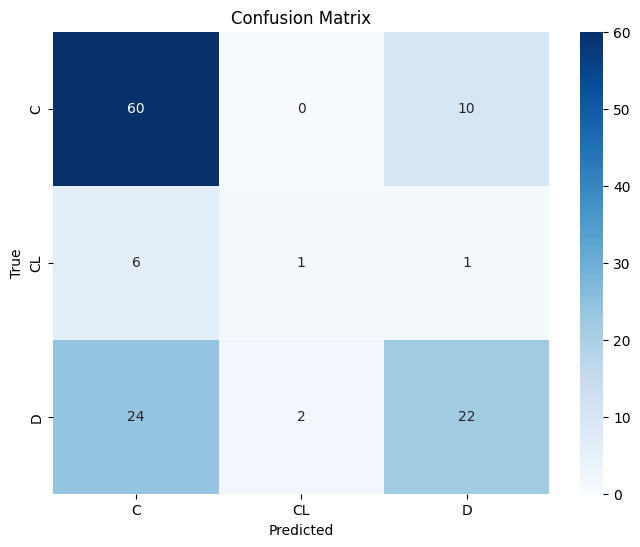

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
from ucimlrepo import fetch_ucirepo

# 1. Pemahaman Data (Data Understanding)
# Fetch dataset
cirrhosis_patient_survival_prediction = fetch_ucirepo(id=878)

# Data (as pandas dataframes)
X = cirrhosis_patient_survival_prediction.data.features
y = cirrhosis_patient_survival_prediction.data.targets

# Metadata
print(cirrhosis_patient_survival_prediction.metadata)

# Variable information
print(cirrhosis_patient_survival_prediction.variables)

# 2. Pemrosesan Awal Data (Preprocessing)
# Tentukan kolom numerik
numerical_cols = X.select_dtypes(include=[np.number]).columns

# Tangani missing values
X[numerical_cols] = X[numerical_cols].fillna(X[numerical_cols].mean())
X = X.fillna(X.mode().iloc[0])  # Mode untuk kategorik

# Encode kolom kategorik
for column in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])

# Encode target jika perlu
if isinstance(y, pd.Series) and y.dtype == 'object':
    y = LabelEncoder().fit_transform(y)

# 3. Standarisasi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Pemodelan (Model KNN)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

# Buat dan latih model KNN
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

# 5. Evaluasi Model
y_pred = model.predict(X_test)

# Akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi: {accuracy:.2f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()